In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as NL
import re

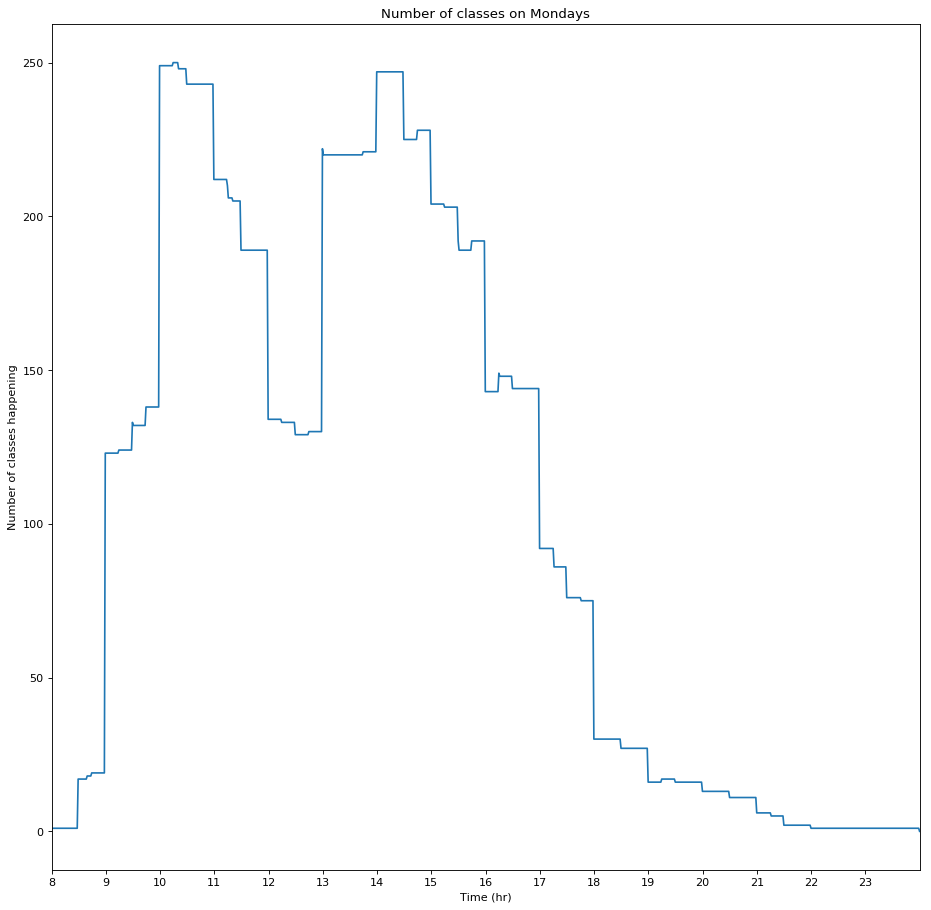

In [26]:
# Read catalog
f = open("cleaned_catalog.txt")
contents = f.read()
f.close()
# Regex for times
matcher=re.compile("[MTWRF]{1,5} \d{4} [AP]M - \d{4} [AP]M")
times=matcher.findall(contents)
# Group information in times
submatcher=re.compile("([MTWRF]{1,5}) (\d{4}) ([AP]M) - (\d{4}) ([AP]M)")
# Matrix of minutes during a week
week=np.zeros([5,24*60])
# Looping
for time in times:
    timeTuple=submatcher.findall(time)[0]
    newTime=[timeTuple[0],int(timeTuple[1]),int(timeTuple[3])]
    if timeTuple[2] == "PM" and timeTuple[1][0:2] != "12":
        newTime[1] += 1200
    if timeTuple[4] == "PM" and timeTuple[3][0:2] != "12":
        newTime[2] += 1200
    newTime[1]= 60*(newTime[1]//100) + (newTime[1] % 100)
    newTime[2]= 60*(newTime[2]//100) + (newTime[2] % 100)
    # Just Mondays
    if re.match("M",newTime[0]):
        for i in range(newTime[1]-1,newTime[2]):
            week[0,i]+=1

#Graphing
fig=plt.figure(num=None, figsize=(14, 14), dpi=80, facecolor='w', edgecolor='k')
ax=fig.gca()
ax.set_title('Number of classes on Mondays')
ax.set_xlabel('Time (hr)')
ax.set_ylabel('Number of classes happening')
plt.plot(np.linspace(0,24,24*60),week[0,:])
plt.xticks(np.arange(0, 24, 1.0))
ax.set_xlim([8,24])
plt.show()

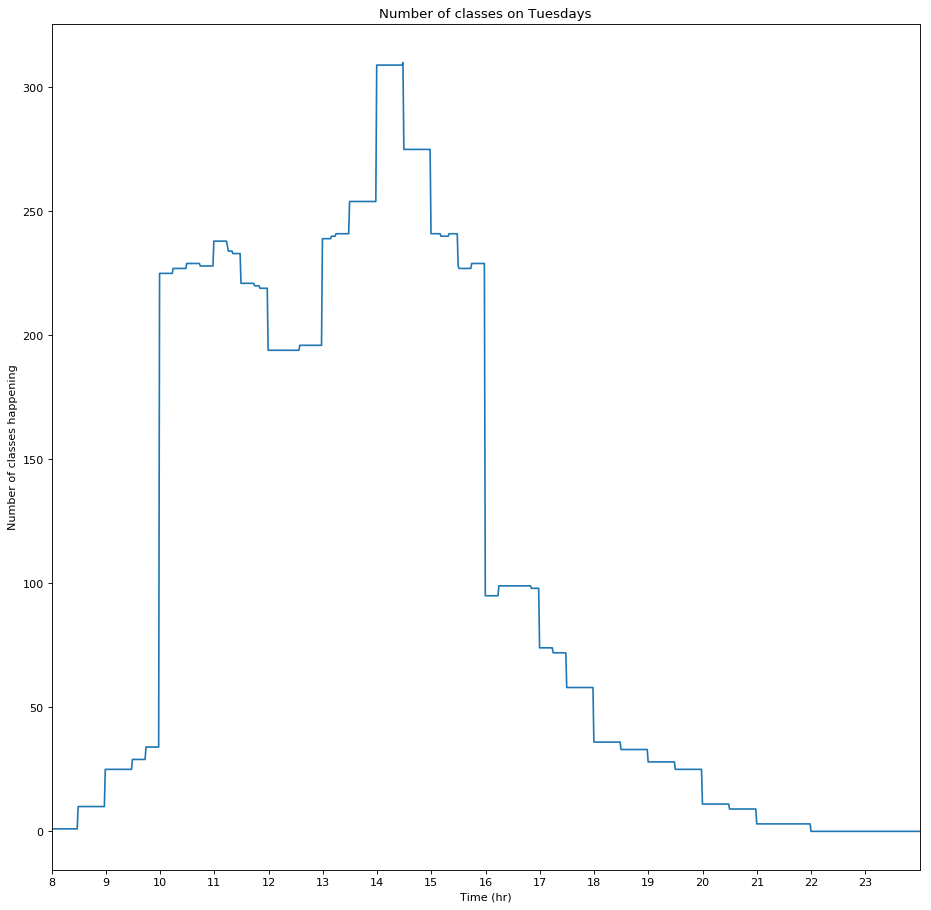

In [27]:
for time in times:
    timeTuple=submatcher.findall(time)[0]
    newTime=[timeTuple[0],int(timeTuple[1]),int(timeTuple[3])]
    if timeTuple[2] == "PM" and timeTuple[1][0:2] != "12":
        newTime[1] += 1200
    if timeTuple[4] == "PM" and timeTuple[3][0:2] != "12":
        newTime[2] += 1200
    newTime[1]= 60*(newTime[1]//100) + (newTime[1] % 100)
    newTime[2]= 60*(newTime[2]//100) + (newTime[2] % 100)
    # Just Tuesdays
    if re.match("T",newTime[0]):
        for i in range(newTime[1]-1,newTime[2]):
            week[1,i]+=1

#Graphing
fig=plt.figure(num=None, figsize=(14, 14), dpi=80, facecolor='w', edgecolor='k')
ax=fig.gca()
ax.set_title('Number of classes on Tuesdays')
ax.set_xlabel('Time (hr)')
ax.set_ylabel('Number of classes happening')
plt.plot(np.linspace(0,24,24*60),week[1,:])
plt.xticks(np.arange(0, 24, 1.0))
ax.set_xlim([8,24])
plt.show()